# Introduction
Our project paper explores the possibility of changing the speed of light (c) with the technique of <b>Coherent Population Oscillations (CPO)</b>. There has been lot of exploration in this area recently due to its practical applications. It allows for the production of "Slow light" (v << c) where speed has been reduced very drastically, "Fast light" (v > c) light made to travel even faster than it's speed in vacuum and even stopped/traped light. Controlling the speed of light has many applications including controllable optical data lines, optical data storage, optical memories, and devices for quantum information. Also when we talk about changing speed of light we are talking about about the group velocity of light which can drastically differ from it's phase velocity in vacuum. Traditionally to avoid high absorption at the region of rapid change in refractive index <b>Electromagnetically Induced Transparency (EIT)</b> was used but this technique has several limitations like material medium requirement to be a low-density atomic vapor or an impurity-doped solid maintained at low temperature. CPO technique has been able to solve this problem, it can work with solids at room temperature. CPO works by making the solid interact with a strong pump beam and a probe beam with a slightly different frequency that makes the population of ground state oscillate at the beat frequency of the two waves, and mathematical analysis shows that this population oscillation leads to rapid frequency variation in the refractive index which leads to very large overall refractive index.

Experimental setup described in the paper is shown below


<img src="files/setup.png">

Argon Ion Laser is fist passed through an attenuator and Electro-optic Modulator as a preprocessing step after that a glass slide is used to split the beam into two parts one with 5% of the total intensity goes straight to the digital oscilloscope and other get's focused on a ruby rod of length 7.25 cm long with a lens of focal length 40 cm. After that final two beams were compared for the delay and attenuation.

# Mathematical Analysis
Consider $^{4}F_{2}$ absorption band as b, ground state as a and intermediate states $2\bar{A}$ and $\bar{E}$ as c. Due to a very short decay time of level b we can approximate this three level system as a two level system.

Below figure explains the approximation
<img src="files/states.png" width="400">

where $T_{1}^{'}$ is the lifetime of c, $T_{2}$ dipole dephasing time, and $T_{1}$ is the total ground state recovery time with the relation $T_{1}$ = $2T_{1}^{'}$. For this two level system density matrix equations are given by:

$\dot{\rho} = -(i\omega + 1/T_{2})\rho_{ba} + (i/\hbar)V_{ba}w$

$\dot{w} = -(w - w^{(eq)})/T_{1} - (2i/\hbar)(V_{ba}\rho_{ba} - V_{ab}\rho_{ab})$

where w and $w^{(eq)}$ are the population and population inversion at thermal equilibrium and

$V_{ba} = -\mu_{ba}(E_{1}e^{-i\omega_{1}t} + E_{3}e^{-i\omega_{3}t})$ and

$\omega_{3} = \omega_{1} + \delta$ 

and w(t) approximation is given by

$w(t) = w^{0} + w^{-\delta}e^{i\delta}t + w^{\delta}e^{-i\delta}t$ 

With following approximations, $\omega_{1} = \omega_{ab}$, $T_{2}^{-1} >> 2|\mu_{ab}||E_{1}|/\hbar$,  $T_{2}^{-1} >> \delta, w^{(eq)} = -1 $

solution of the above system different equation turns out to be 

<img src="files/p.png" width="380">

where 

<img src="files/beta.png" width="380">

By using the equation
$\chi^{(\delta)} = N\mu_{ab}\rho_{ba}(\omega_{3})/E_{3}$

This gives refractive index and absorption coefficient as 

<img src="files/ri.png" width="380">

<img src="files/alpha.png" width="380">


where $I_{0} = I_{1}/I_{sat} = \Omega^{3}T_{1}T_{2}$ and $\alpha_{0}$ is unsaturated absorption cofficient.

finally using $n_{mod} = n_{1} + \omega_{1}[n(\delta) - n(-\delta)]/2\delta$

we get refractive index for the group velocity

<img src="files/n_mod.png" width="380">

Similarly, the relative attenuation is given 

<img src="files/a.png" width="320">

with $I_{0}$ following the differential equation

<img src="files/diff.png" width="200">


# Code & Simulations

In [4]:
#importing necessary dependencies
import math
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#solution of modulated refractive index
def n_mod(n1, alpha, c, T1, I, delta):
    n_m = n1 + ((alpha*c*T1)/2)*(I/(1 + I))*(1/((1 + I)**2 + (T1*delta)**2)) 
    return n_m

In [30]:
#modulation attenuation
#Difference between attenuation of modulation intensity and pump intensity
def mod_att(L, T1, I, delta):
    att = 0.5*math.log(((1 + integral(L))**2 + (T1*delta)**2)/((1 + integral(0))**2 + (T1*delta)**2))
    return att

In [15]:
#defining various constants value given in the paper
alpha = 1.17 #cm-1
T1 = 4.45 #ms
I0 = 1.5*1e3 #W/cm^2
L0 = 514.5*1e-9 #nm
L = 7.25 #nm
n1 = 1
c = 3*1e10 #cm^2/s

In [10]:
#differential equation of I with respect to L
def diff_I(I, L, alpha):
    dIdZ = -alpha*I/(1 + I)
    return dIdZ

In [11]:
#function for numeric solution of the above equation
def integral(L):
    l = np.linspace(L0, L, 2)
    i = integrate.odeint(diff_I, I0, l, args=(alpha, ))
    return i[1][0]

# Plots

In [22]:
#delta variations
delta = np.linspace(0, 1000, 100)

(100,)

In [23]:
y = []
for e in delta:
    y.append(n_mod(n1, alpha, c, T1, integral(L), e))
y = np.array(y)

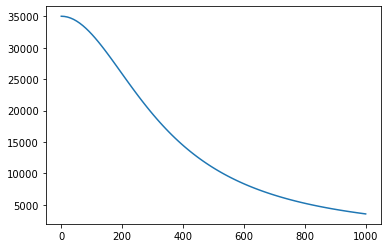

In [25]:
plt.plot(delta, y) # refractive index vs delta

In [31]:
a = []
for e in delta:
    a.append(mod_att(L, T1, integral(L), e))
a = np.array(a)

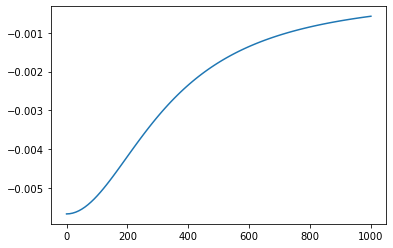

In [33]:
plt.plot(delta, a) # attenuation vs delta